# Data cleaning

**Dataset used**
- open_iof_20min_dataset.csv

In [1]:
# Mount Google Drive and change directory 
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ColabNotebooks/SACAC-EDA-2024/examples

In [ ]:

# Import packages
import pandas as pd                 
import matplotlib.pyplot as plt     
import numpy as np                  

In [2]:
# pandas display format: two decimals
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Ingest data
fname = '../data/open_iof_20min_dataset.csv'
indexColumn = 'date' 
dateColumns = ['date']
df = pd.read_csv(fname, index_col=indexColumn, parse_dates=dateColumns) 

In [4]:
# Look at current column names
df.columns

Index(['plant.feed.iron.comp', 'plant.feed.silica.comp',
       'plant.flotation.sump01.starch.flow',
       'plant.flotation.sump01.amina.flow',
       'plant.flotation.sump01.discharge.flow',
       'plant.flotation.sump01.discharge.ph',
       'plant.flotation.sump01.discharge.density',
       'plant.flotation.bank01.column01.air.flow',
       'plant.flotation.bank01.column02.air.flow',
       'plant.flotation.bank01.column03.air.flow',
       'plant.flotation.bank01.column04.air.flow',
       'plant.flotation.bank01.column05.air.flow',
       'plant.flotation.bank01.column06.air.flow',
       'plant.flotation.bank01.column07.air.flow',
       'plant.flotation.bank01.column01.froth.depth',
       'plant.flotation.bank01.column02.froth.depth',
       'plant.flotation.bank01.column03.froth.depth',
       'plant.flotation.bank01.column04.froth.depth',
       'plant.flotation.bank01.column05.froth.depth',
       'plant.flotation.bank01.column06.froth.depth',
       'plant.flotation.bank

In [5]:
# Rename columns
## Rename columns (variables) for easier interpretation
# Create a dictionory which contains the old names and new names
# Format: dictionary = {'old_name_variable_1': 'new_name_variable_1', 'old_name_variable_2': 'new_name_variable_2'}
old_comp_names = ['plant.feed.iron.comp', 
                'plant.feed.silica.comp',
                'plant.filters.product.iron.comp', 
                'plant.filters.product.silica.comp']
new_comp_names = ['d feed iron %',
                'd feed silica %',
                'y product iron %',
                'y product silica %']

old_sump_names = ['plant.flotation.sump01.starch.flow',
                'plant.flotation.sump01.amina.flow',
                'plant.flotation.sump01.discharge.flow',
                'plant.flotation.sump01.discharge.ph',
                'plant.flotation.sump01.discharge.density']

new_sump_names = ['u starch m3/h',
                'u amina m3/h',
                'd feed m3/h',
                'd feed ph',
                'd feed SG']

old_air_flow_names = [name for name in df.columns if 'air.flow' in name]
new_air_flow_names = [name.replace('plant.flotation.bank01.column','x C') + ' Nm3/h' for name in old_air_flow_names]

old_depth_names = [name for name in df.columns if 'froth' in name]
new_depth_names = [name.replace('plant.flotation.bank01.column','x C') + ' mm' for name in old_depth_names]

old_names = old_comp_names+old_sump_names+old_air_flow_names+old_depth_names
new_names = new_comp_names+new_sump_names+new_air_flow_names+new_depth_names

nameChangeDictionary = dict(zip(old_names,new_names))
nameChangeDictionary

{'plant.feed.iron.comp': 'd feed iron %',
 'plant.feed.silica.comp': 'd feed silica %',
 'plant.filters.product.iron.comp': 'y product iron %',
 'plant.filters.product.silica.comp': 'y product silica %',
 'plant.flotation.sump01.starch.flow': 'u starch m3/h',
 'plant.flotation.sump01.amina.flow': 'u amina m3/h',
 'plant.flotation.sump01.discharge.flow': 'd feed m3/h',
 'plant.flotation.sump01.discharge.ph': 'd feed ph',
 'plant.flotation.sump01.discharge.density': 'd feed SG',
 'plant.flotation.bank01.column01.air.flow': 'x C01.air.flow Nm3/h',
 'plant.flotation.bank01.column02.air.flow': 'x C02.air.flow Nm3/h',
 'plant.flotation.bank01.column03.air.flow': 'x C03.air.flow Nm3/h',
 'plant.flotation.bank01.column04.air.flow': 'x C04.air.flow Nm3/h',
 'plant.flotation.bank01.column05.air.flow': 'x C05.air.flow Nm3/h',
 'plant.flotation.bank01.column06.air.flow': 'x C06.air.flow Nm3/h',
 'plant.flotation.bank01.column07.air.flow': 'x C07.air.flow Nm3/h',
 'plant.flotation.bank01.column01.f

In [6]:
# Rename columns in the data frame according to the specified dictionary
df.rename(columns=nameChangeDictionary, inplace=True)
# Look at the new column names
df.columns

Index(['d feed iron %', 'd feed silica %', 'u starch m3/h', 'u amina m3/h',
       'd feed m3/h', 'd feed ph', 'd feed SG', 'x C01.air.flow Nm3/h',
       'x C02.air.flow Nm3/h', 'x C03.air.flow Nm3/h', 'x C04.air.flow Nm3/h',
       'x C05.air.flow Nm3/h', 'x C06.air.flow Nm3/h', 'x C07.air.flow Nm3/h',
       'x C01.froth.depth mm', 'x C02.froth.depth mm', 'x C03.froth.depth mm',
       'x C04.froth.depth mm', 'x C05.froth.depth mm', 'x C06.froth.depth mm',
       'x C07.froth.depth mm', 'y product iron %', 'y product silica %'],
      dtype='object')

In [7]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
d feed iron %,301.00,54.61,3.97,42.74,52.28,55.09,56.95,65.78
d feed silica %,300.00,16.56,6.02,1.31,12.60,15.94,20.43,33.40
u starch m3/h,"12,071.00","2,956.89","1,087.66",0.84,"2,175.36","3,077.12","3,709.12","6,289.64"
u amina m3/h,"12,074.00",489.62,88.38,242.19,434.79,505.65,553.93,739.01
d feed m3/h,"12,074.00",397.51,9.12,376.42,398.00,399.75,400.97,418.55
d feed ph,"12,028.00",9.77,0.39,8.75,9.53,9.80,10.03,10.81
d feed SG,"12,023.00",1.68,0.07,1.52,1.65,1.70,1.73,1.85
x C01.air.flow Nm3/h,"11,969.00",280.80,29.17,175.79,250.16,299.74,299.98,367.93
x C02.air.flow Nm3/h,"12,040.00",277.88,29.22,177.08,250.16,299.32,300.07,311.31
x C03.air.flow Nm3/h,"12,012.00",281.59,27.99,176.56,250.07,299.49,299.84,310.76


## Outliers: .loc()
The slicing/indexing function with assignment can be used to deal with outliers:

Identify outlier rows and replace outliers with missing values (`np.nan`). Missing values can then be handled as discussed further below. 

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

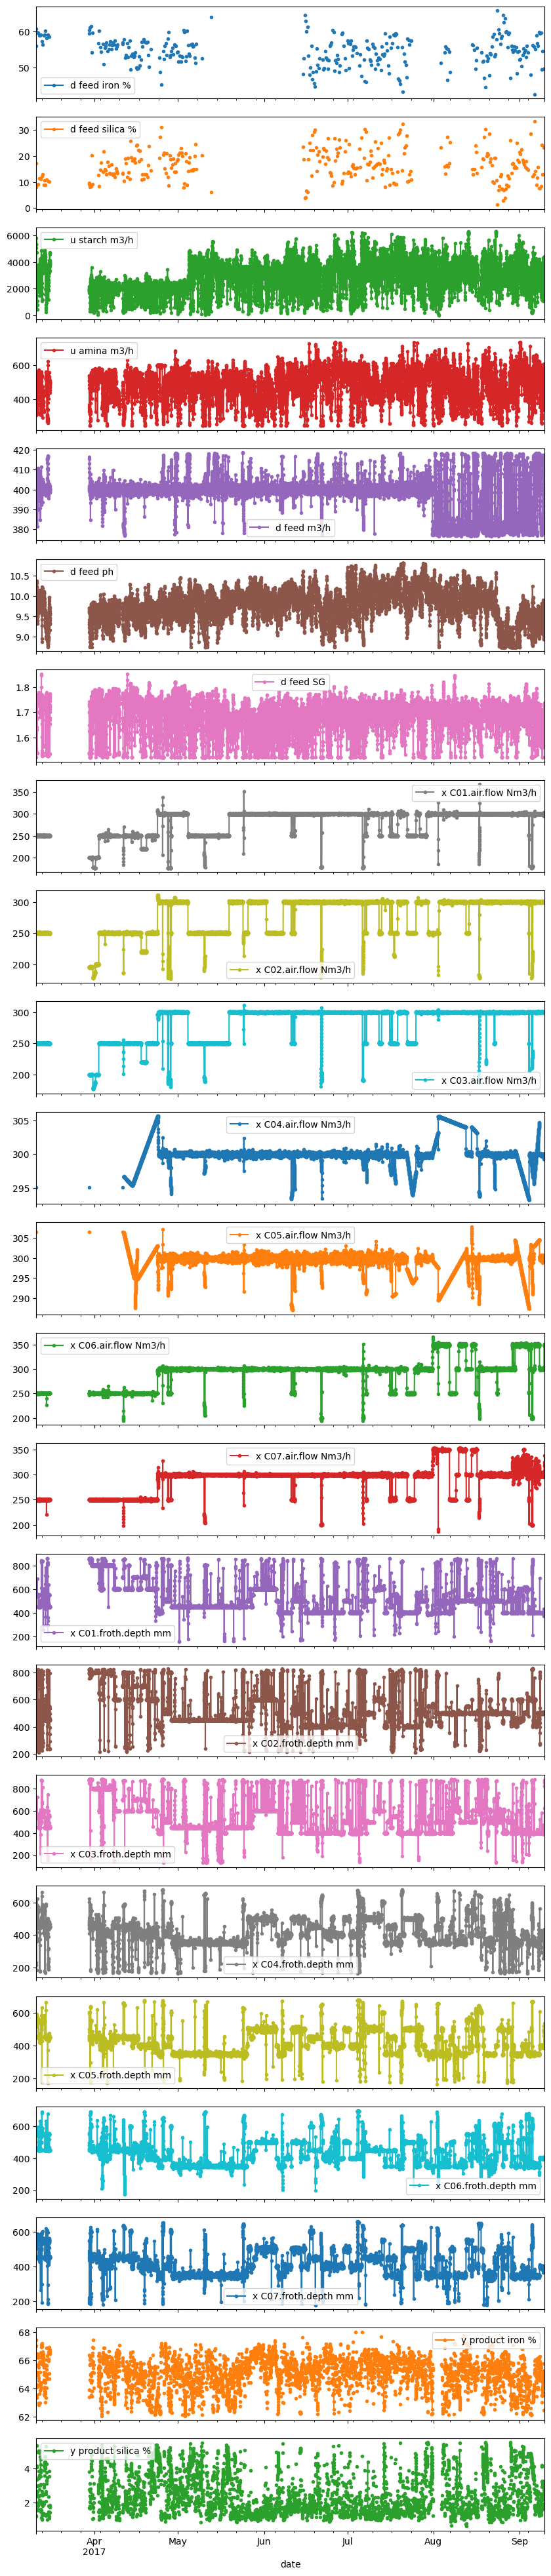

In [8]:
# Outlier detection: Knowledge-based (visual highlighting)
df.plot(subplots=True,figsize=(10,50),marker='.')
# Domain-knowledge prompts: 
# air flow < 200 Nm3/h
# froth depth < 200 mm

In [9]:
# Outlier detection:
# Assigning missing values to rows specified as containing outliers
outlierRowsAirFlow01 = df['x C01.air.flow Nm3/h'] < 200
df.loc[outlierRowsAirFlow01,'x C01.air.flow Nm3/h'] = np.nan
df.describe().T

,count,mean,std,min,25%,50%,75%,max
d feed iron %,301.00,54.61,3.97,42.74,52.28,55.09,56.95,65.78
d feed silica %,300.00,16.56,6.02,1.31,12.60,15.94,20.43,33.40
u starch m3/h,"12,071.00","2,956.89","1,087.66",0.84,"2,175.36","3,077.12","3,709.12","6,289.64"
u amina m3/h,"12,074.00",489.62,88.38,242.19,434.79,505.65,553.93,739.01
d feed m3/h,"12,074.00",397.51,9.12,376.42,398.00,399.75,400.97,418.55
d feed ph,"12,028.00",9.77,0.39,8.75,9.53,9.80,10.03,10.81
d feed SG,"12,023.00",1.68,0.07,1.52,1.65,1.70,1.73,1.85
x C01.air.flow Nm3/h,"11,632.00",283.53,24.65,200.01,250.22,299.76,299.99,367.93
x C02.air.flow Nm3/h,"12,040.00",277.88,29.22,177.08,250.16,299.32,300.07,311.31
x C03.air.flow Nm3/h,"12,012.00",281.59,27.99,176.56,250.07,299.49,299.84,310.76


<Axes: xlabel='date'>

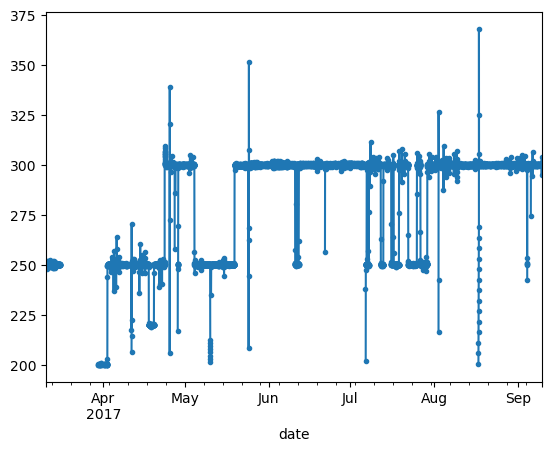

In [10]:
# Outlier detection
df['x C01.air.flow Nm3/h'].plot(marker='.')

In [11]:
# Remove outliers from more columns
for name in new_air_flow_names:
    df.loc[df[name]<200,name] = np.nan

In [12]:
# Check statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
d feed iron %,301.00,54.61,3.97,42.74,52.28,55.09,56.95,65.78
d feed silica %,300.00,16.56,6.02,1.31,12.60,15.94,20.43,33.40
u starch m3/h,"12,071.00","2,956.89","1,087.66",0.84,"2,175.36","3,077.12","3,709.12","6,289.64"
u amina m3/h,"12,074.00",489.62,88.38,242.19,434.79,505.65,553.93,739.01
d feed m3/h,"12,074.00",397.51,9.12,376.42,398.00,399.75,400.97,418.55
d feed ph,"12,028.00",9.77,0.39,8.75,9.53,9.80,10.03,10.81
d feed SG,"12,023.00",1.68,0.07,1.52,1.65,1.70,1.73,1.85
x C01.air.flow Nm3/h,"11,632.00",283.53,24.65,200.01,250.22,299.76,299.99,367.93
x C02.air.flow Nm3/h,"11,728.00",280.20,25.84,200.04,250.25,299.38,300.08,311.31
x C03.air.flow Nm3/h,"11,700.00",283.95,24.28,200.01,250.15,299.50,299.85,310.76


# > Practice Point <
Remove outliers from 'x C04.froth.depth mm' where the values are above 600. Display the basic statistics of the data frame or plot the froth depth data to check if your outlier removal worked.

## Missing values: .fillna()
Missing values (represented by `np.nan`) can be replaced by fixed values, e.g., the mean or median of the variable in question. The method `.fillna()` can be used to replace `np.nan` with a fixed value.

`.fillna()` can also be used for forward filling or backward filling, by specifing a method to fill, instead of a fixed value.

<Axes: xlabel='date'>

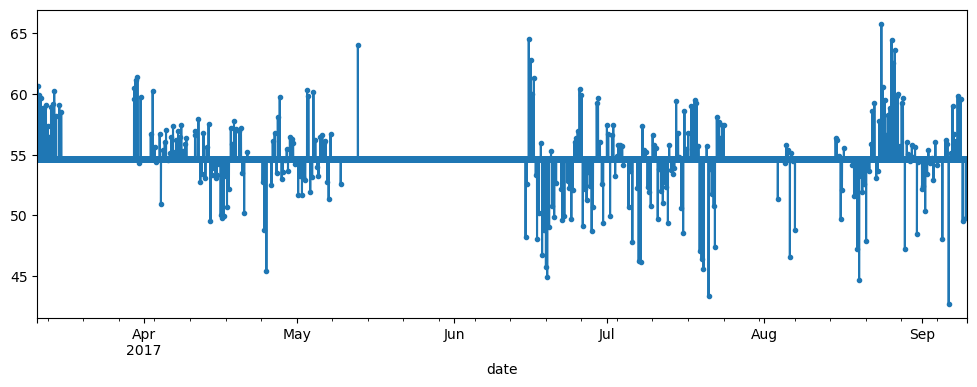

In [13]:
# Missing values: Filling with fixed value
df['d feed iron % (mean replacement)'] = df['d feed iron %'].fillna(df['d feed iron %'].mean())
df['d feed iron % (mean replacement)'].plot(marker='.',figsize=(12,4))

C:\Users\Lidia\AppData\Local\Temp\ipykernel_47184\1165400337.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['d feed iron % (forward fill)'] = df['d feed iron %'].fillna(method='ffill')


<Axes: xlabel='date'>

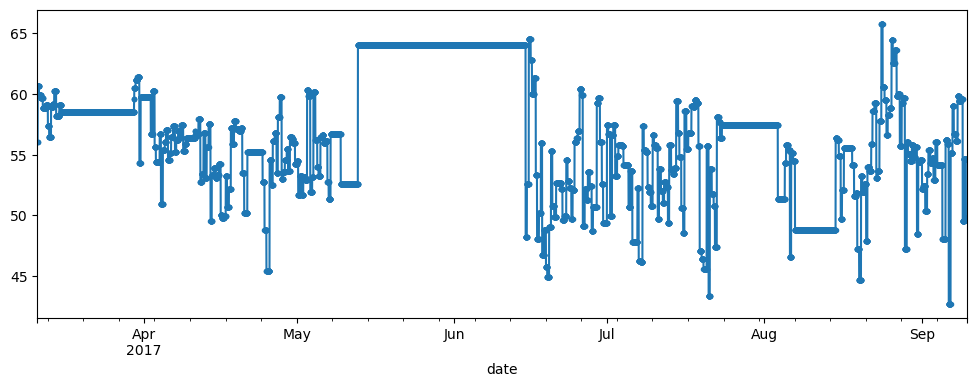

In [14]:
# Missing values: Forward fill
df['d feed iron % (forward fill)'] = df['d feed iron %'].fillna(method='ffill')
df['d feed iron % (forward fill)'].plot(marker='.',figsize=(12,4))

C:\Users\Lidia\AppData\Local\Temp\ipykernel_47184\147461966.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['d feed iron % (backward fill)'] = df['d feed iron %'].fillna(method='bfill')


<Axes: xlabel='date'>

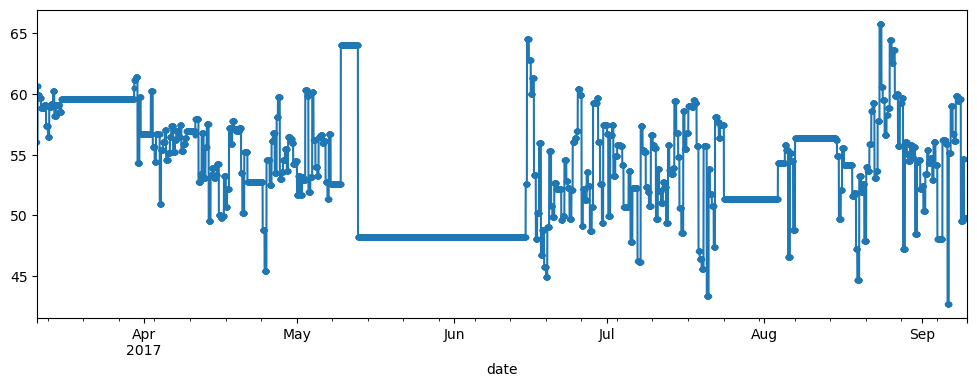

In [15]:
# Missing values: Backward fill
df['d feed iron % (backward fill)'] = df['d feed iron %'].fillna(method='bfill')
df['d feed iron % (backward fill)'].plot(marker='.',figsize=(12,4))

<Axes: xlabel='date'>

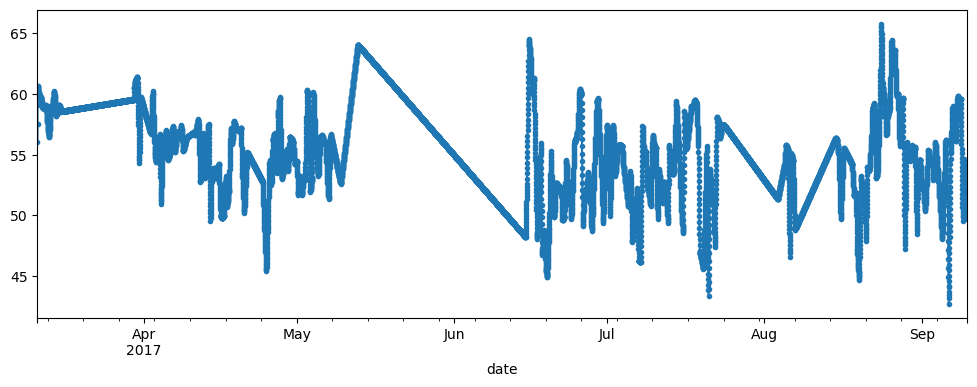

In [16]:
# Missing values: Interpolation (linear, time reference)
df['d feed iron % (interpolated)'] = df['d feed iron %'].interpolate(method='time')
df['d feed iron % (interpolated)'].plot(marker='.',figsize=(12,4))

# > Practice Point <
Use different methods to fill 'd feed silica %' missing values. Show the result of the data cleaning by plotting the filled variable in a time series.

In [17]:
# Missing values: Final replacement decision
df['d feed iron %'] = df['d feed iron %'].fillna(method='bfill')
df['d feed silica %'] = df['d feed silica %'].fillna(method='bfill')

C:\Users\Lidia\AppData\Local\Temp\ipykernel_47184\1549422091.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['d feed iron %'] = df['d feed iron %'].fillna(method='bfill')
C:\Users\Lidia\AppData\Local\Temp\ipykernel_47184\1549422091.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['d feed silica %'] = df['d feed silica %'].fillna(method='bfill')


In [18]:
# Drop demonstraton variables from data frame
variables_to_delete = ['d feed iron % (mean replacement)',
    'd feed iron % (forward fill)',
    'd feed iron % (backward fill)',
    'd feed iron % (interpolated)']
df.drop(labels=variables_to_delete,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13176 entries, 2017-03-11 00:00:00 to 2017-09-09 23:40:00
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   d feed iron %         13153 non-null  float64
 1   d feed silica %       13153 non-null  float64
 2   u starch m3/h         12071 non-null  float64
 3   u amina m3/h          12074 non-null  float64
 4   d feed m3/h           12074 non-null  float64
 5   d feed ph             12028 non-null  float64
 6   d feed SG             12023 non-null  float64
 7   x C01.air.flow Nm3/h  11632 non-null  float64
 8   x C02.air.flow Nm3/h  11728 non-null  float64
 9   x C03.air.flow Nm3/h  11700 non-null  float64
 10  x C04.air.flow Nm3/h  10737 non-null  float64
 11  x C05.air.flow Nm3/h  10835 non-null  float64
 12  x C06.air.flow Nm3/h  11740 non-null  float64
 13  x C07.air.flow Nm3/h  11961 non-null  float64
 14  x C01.froth.depth mm  12044 non-nul

## Missing values: Understanding the size of the problem

In [19]:
# Count missing value occurences in a variable
print("Missing data percent:")
for vname in df.columns:
    missingpercent = 100*df[vname].isnull().sum()/df.shape[0]
    if missingpercent > 0:
        print(f"{missingpercent:4.1f} % missing in {vname}")
        # Unpacking {missingpercent:4.1f} 
        # -- missingpercent = number to display
        # -- : = indicates that formatting of number will follow
        # -- 4 = width in characters allocated for display of number (can be longer)
        # -- . = indicates decimal point
        # -- 1 = indicates number of digits after decimal point
        # -- f = indicates variable type, a floating point number in this case

Missing data percent:
 0.2 % missing in d feed iron %
 0.2 % missing in d feed silica %
 8.4 % missing in u starch m3/h
 8.4 % missing in u amina m3/h
 8.4 % missing in d feed m3/h
 8.7 % missing in d feed ph
 8.8 % missing in d feed SG
11.7 % missing in x C01.air.flow Nm3/h
11.0 % missing in x C02.air.flow Nm3/h
11.2 % missing in x C03.air.flow Nm3/h
18.5 % missing in x C04.air.flow Nm3/h
17.8 % missing in x C05.air.flow Nm3/h
10.9 % missing in x C06.air.flow Nm3/h
 9.2 % missing in x C07.air.flow Nm3/h
 8.6 % missing in x C01.froth.depth mm
 8.4 % missing in x C02.froth.depth mm
 8.4 % missing in x C03.froth.depth mm
 8.4 % missing in x C04.froth.depth mm
 8.4 % missing in x C05.froth.depth mm
 8.4 % missing in x C06.froth.depth mm
 8.4 % missing in x C07.froth.depth mm
69.5 % missing in y product iron %
68.0 % missing in y product silica %


## Noise removal: .rolling()
Rolling window calculations can be done on data frames. For a specific row, a window (i.e., fixed number of preceding rows) is considered, and a calculation done on values on that window. The result is stored in that row, and then the window calculation is repeated for the next row.

The sample time is specified in special string notation, with format `[number][unit]`, e.g., `'10S'`. Units include:
- 'D': day frequency
- 'H': hour frequency
- 'T' or 'min': minute frequency
- 'S': second frequency

For more units, see [this link](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases).

When `.rolling()` is applied, the sampling frequency of the data frame stays the same.

<Axes: xlabel='date'>

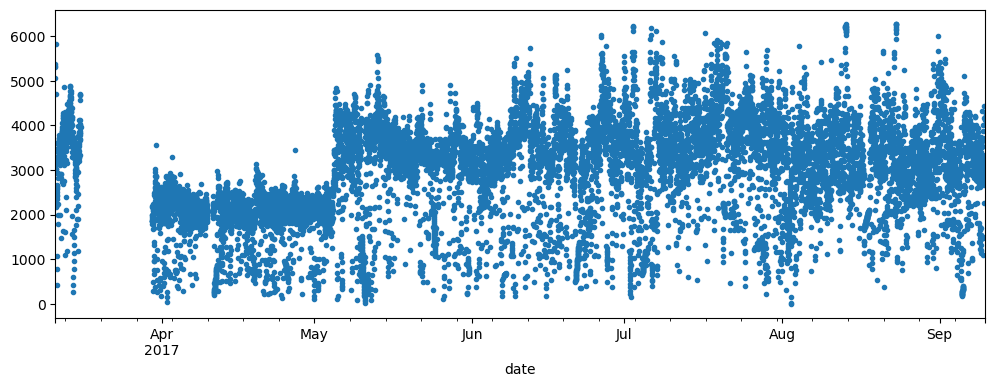

In [20]:
# Noise removal: Filtering
# Visualize noisy variable
df['u starch m3/h'].plot(marker='.',ls='none',figsize=(12,4))

<Axes: xlabel='date'>

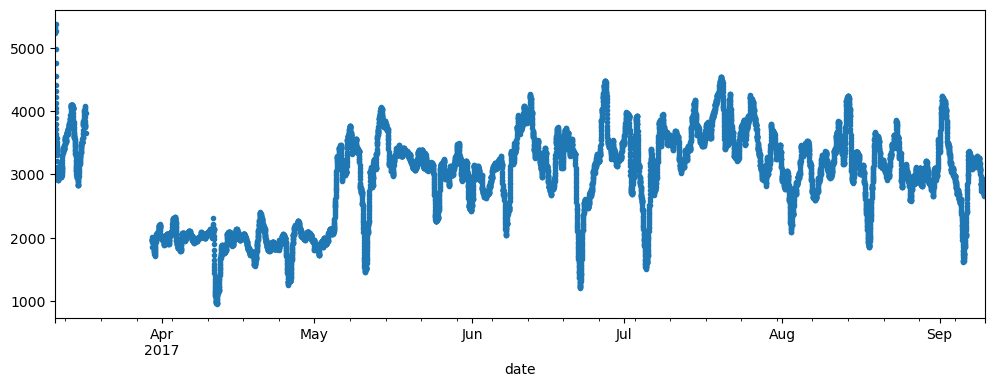

In [21]:
# Noise removal: Filtering
# Rolling average
df['u starch m3/h (filtered)'] = df['u starch m3/h'].rolling('1D').mean()
# Visualize smoothed variable
df['u starch m3/h (filtered)'].plot(marker='.',ls='none',figsize=(12,4))

# > Practice Point <
Play around with the size of the rolling window (e.g., 1 hour, 1 day, 1 week) and the type of summary statistic (e.g., mean, median, maximum, sum) to determine a good tradeoff of rolling window size as well as summary statistic. Visualize your result in each case.

## Down/upsampling: Resampling
For time series data, the `.resample()` method can be used to change the sample time of the data. For example, if the data was original captured at 20 second intervals, but a rolled up sample time of 1 hour is of interest, `.resample()` can be used to aggregate the data to 1 hour intervals.

**Downsampling** involves going from a high sampling frequency (short time between samples) to a low sampling frequency (long time between samples). This implies that some aggregate statistic needs to be calculated to transform the many samples of the high frequency data to the fewer samples of the low frequency result. Operations like `.mean()` or `.median()` can be used.

**Upsampling** involves going from a low sampling frequency to a high sampling frequency. This will result in missing values (`NaN`), since it is unknown what happened between observed values. Missing value replacement can be used to estimate ("guess") what happed at a higher frequency.

When `.resample()` is applied, the sampling frequency of the data frame changes. 

In [22]:
# Downsampling: Median approach
# (downsampled to hourly values)
dfIOFHourly = df.resample('1H').median()
dfIOFHourly.head()

,d feed iron %,d feed silica %,u starch m3/h,u amina m3/h,d feed m3/h,d feed ph,d feed SG,x C01.air.flow Nm3/h,x C02.air.flow Nm3/h,x C03.air.flow Nm3/h,...,x C01.froth.depth mm,x C02.froth.depth mm,x C03.froth.depth mm,x C04.froth.depth mm,x C05.froth.depth mm,x C06.froth.depth mm,x C07.froth.depth mm,y product iron %,y product silica %,u starch m3/h (filtered)
date,,,,,,,,,,,,,,,,,,,,,
2017-03-11 00:00:00,60.66,8.25,"5,310.20",305.98,400.65,10.02,1.55,249.10,250.43,249.62,...,549.61,549.43,549.44,544.59,542.22,550.39,556.02,67.03,1.23,"5,310.20"
2017-03-11 01:00:00,59.89,8.98,"5,378.17",373.93,400.05,10.27,1.73,249.54,250.38,249.89,...,549.07,551.93,548.72,214.69,551.06,551.49,550.74,67.44,1.17,"5,269.60"
2017-03-11 02:00:00,59.89,8.98,"3,159.09",361.57,400.30,10.32,1.75,248.96,250.51,250.07,...,546.91,551.74,549.91,546.21,545.33,549.81,544.89,66.40,2.50,"4,753.91"
2017-03-11 03:00:00,59.89,8.98,"3,210.84",330.75,398.55,10.02,1.74,248.97,249.91,250.12,...,551.09,551.04,550.76,454.82,545.00,554.24,550.03,65.12,4.14,"4,307.46"
2017-03-11 04:00:00,59.89,8.98,"3,027.74",321.24,401.18,10.22,1.75,250.07,249.96,250.25,...,550.35,549.64,549.72,471.75,546.51,549.42,551.11,64.26,3.34,"4,053.84"


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

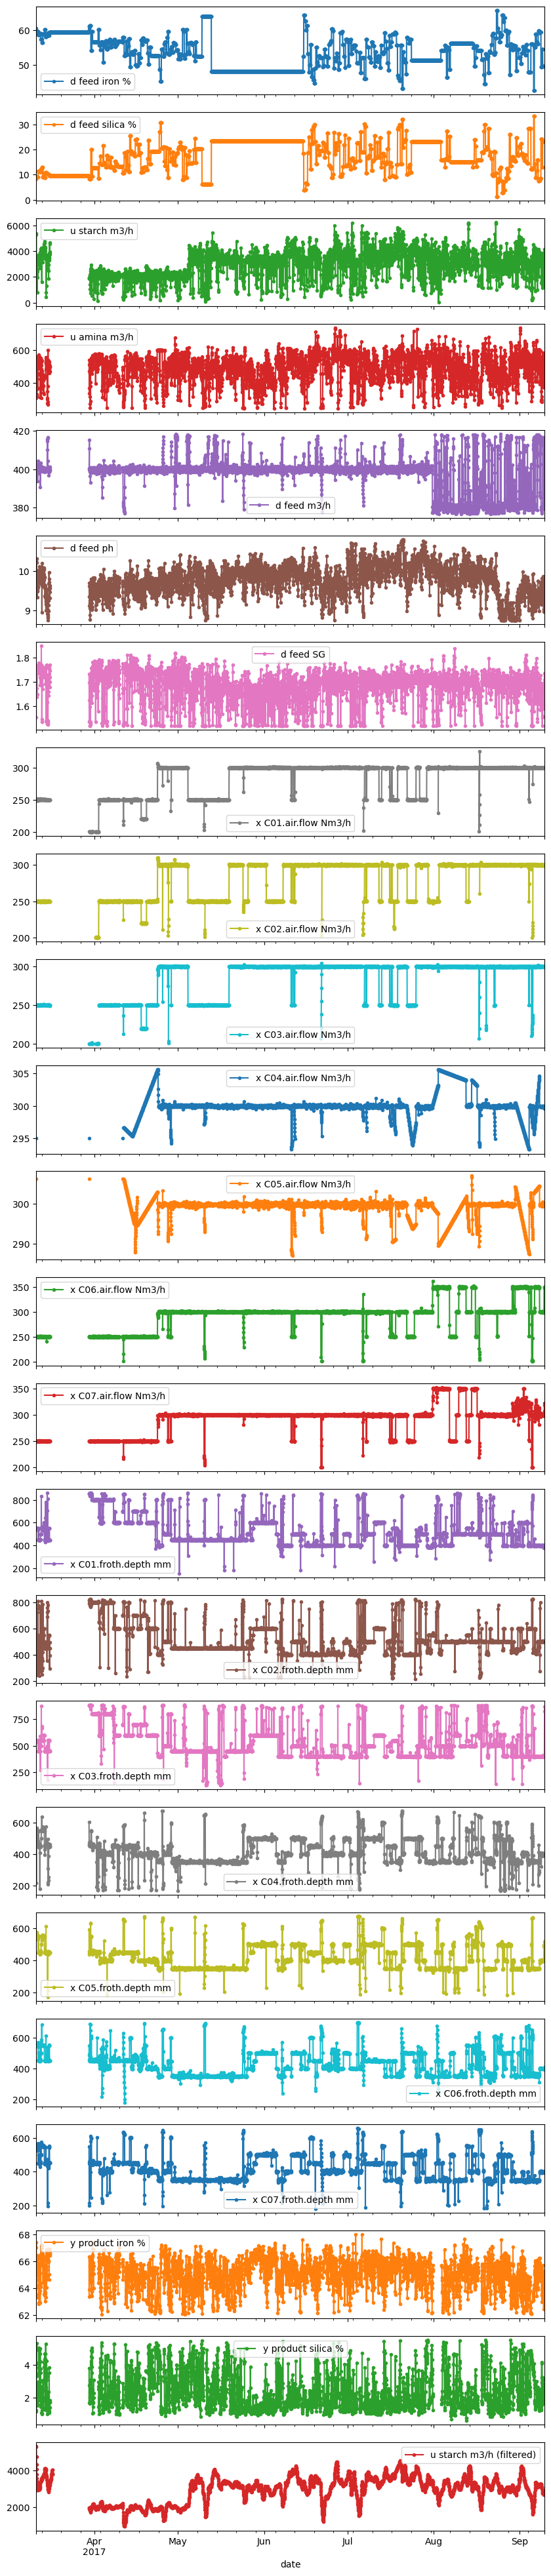

In [23]:
# Downsampling: Median approach
dfIOFHourly.plot(subplots=True,marker='.',figsize=(10,50))

## Missing values: .dropna()
List-wise deletion of missing values (i.e., removing rows with any missing values in it) can be done with the `.dropna()` method. To ensure that the data frame is modified, the argument `inplace=True` is included.

In [24]:
## Missing values: List-wise deletion
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2017-03-11 00:00:00 to 2017-09-09 16:00:00
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   d feed iron %             3392 non-null   float64
 1   d feed silica %           3392 non-null   float64
 2   u starch m3/h             3392 non-null   float64
 3   u amina m3/h              3392 non-null   float64
 4   d feed m3/h               3392 non-null   float64
 5   d feed ph                 3392 non-null   float64
 6   d feed SG                 3392 non-null   float64
 7   x C01.air.flow Nm3/h      3392 non-null   float64
 8   x C02.air.flow Nm3/h      3392 non-null   float64
 9   x C03.air.flow Nm3/h      3392 non-null   float64
 10  x C04.air.flow Nm3/h      3392 non-null   float64
 11  x C05.air.flow Nm3/h      3392 non-null   float64
 12  x C06.air.flow Nm3/h      3392 non-null   float64
 13  x C07.air.flow Nm3/h      3

In [25]:
# Export clean dataset
df.to_csv('../data/open_data_cleaned.csv')